In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
import nasdaqdatalink as nd


In [116]:
start = datetime.today() - timedelta(days=365)
start = start.strftime("%Y-%m-%d")

end = datetime.today()
end = end.strftime("%Y-%m-%d")

df_tsla = nd.get("WIKI/TSLA", start_date='2006-10-01', end_date='12-01-02')


In [117]:
df_tsla = df_tsla[["Open", "Close"]]

<Axes: xlabel='Date'>

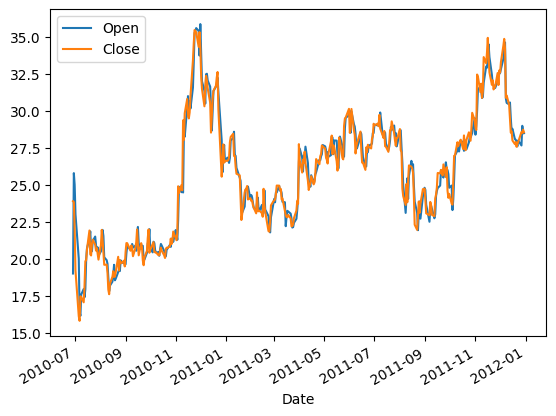

In [118]:
df_tsla.plot(fig=(12,6), legend=True) 

In [119]:
df_tsla['MA_20'] = (df_tsla['Close']).rolling(20).mean()
df_tsla['MA_50'] = (df_tsla['Close']).rolling(50).mean()
df_tsla = df_tsla.drop(columns=['Open'], axis=1)

In [120]:
def MovingAverage(data, period):
    return pd.Series(data).rolling(period).mean()

In [121]:
#df_tsla['MA_100'] = MovingAverage(df_tsla['Close'], 100)
df_tsla.dropna(inplace=True)

In [122]:
df_tsla['SHORT_GR_LONG'] = np.where(df_tsla['MA_20'] > df_tsla['MA_50'], 1, 0)
df_tsla.tail(10)

,Close,MA_20,MA_50,SHORT_GR_LONG
Date,,,,
2011-12-16,28.00,31.6455,30.5550,1
2011-12-19,27.75,31.4030,30.5702,1
2011-12-20,27.90,31.2100,30.5706,1
2011-12-21,27.57,30.9850,30.5698,1
2011-12-22,27.77,30.8010,30.5692,1
2011-12-23,27.90,30.6130,30.5684,1
2011-12-27,28.57,30.4135,30.5788,0
2011-12-28,28.51,30.2515,30.6006,0
2011-12-29,28.73,30.0510,30.6084,0


In [123]:
df_tsla['Signal'] = df_tsla['SHORT_GR_LONG'].diff()
df_tsla.head(10)

,Close,MA_20,MA_50,SHORT_GR_LONG,Signal
Date,,,,,
2010-09-08,20.900,19.52200,19.8336,0,NaN
2010-09-09,20.710,19.66250,19.7700,0,0.0
2010-09-10,20.170,19.79100,19.6968,1,1.0
2010-09-13,20.720,19.91100,19.6720,1,0.0
2010-09-14,21.120,20.02800,19.7104,1,0.0
2010-09-15,21.980,20.16950,19.8278,1,0.0
2010-09-16,20.940,20.27800,19.9306,1,0.0
2010-09-17,20.230,20.35000,19.9860,1,0.0
2010-09-20,21.055,20.44775,20.0591,1,0.0


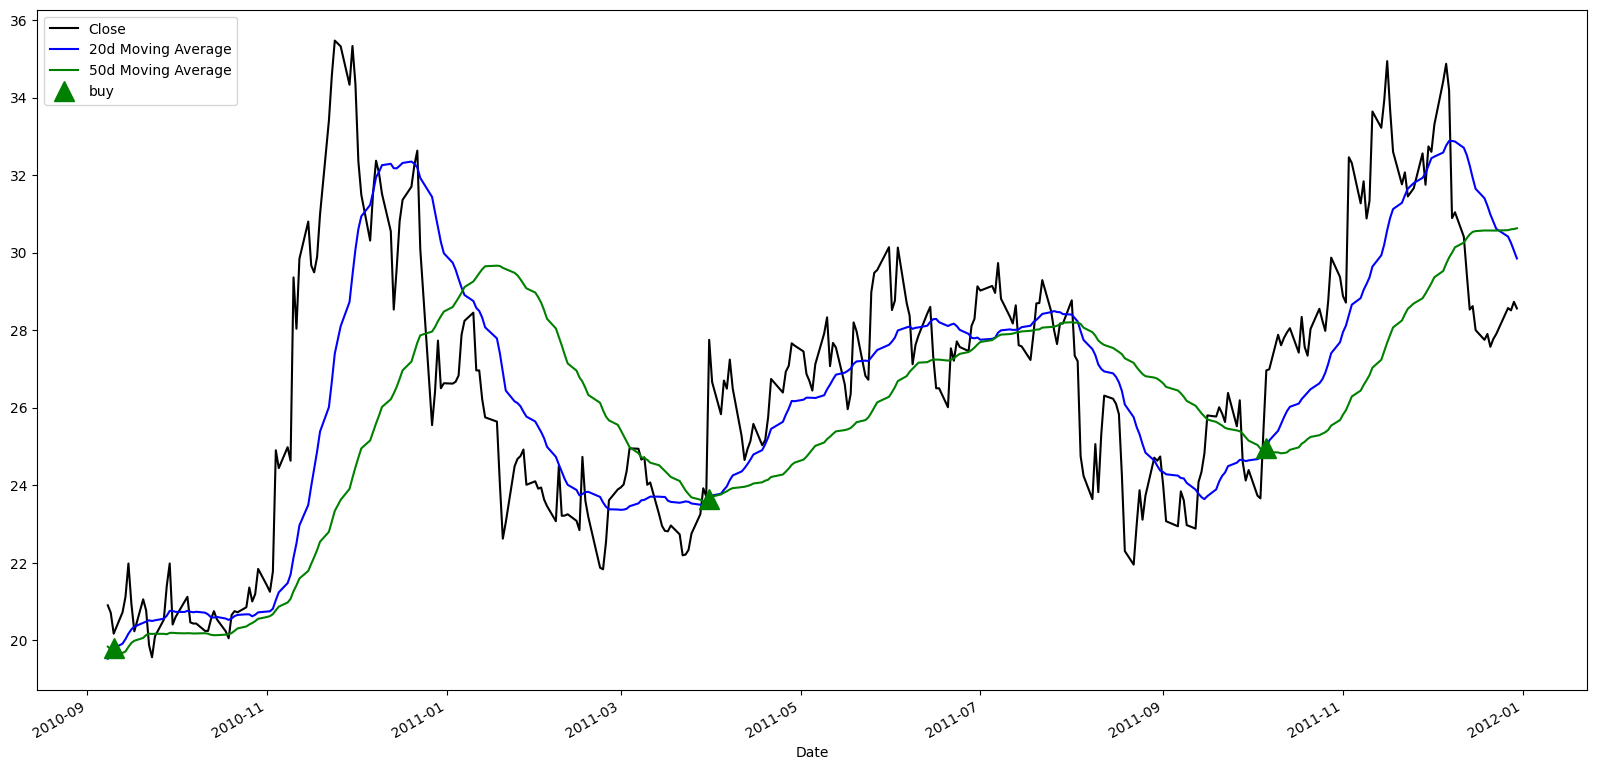

In [124]:
plt.figure(figsize=(20,10))
df_tsla['Close'].plot(label='Close', color='k')
df_tsla['MA_20'].plot(label='20d Moving Average', color='b')
df_tsla['MA_50'].plot(label='50d Moving Average', color='g')

#add BUY signal to the plot
plt.plot(df_tsla[df_tsla['Signal'] == 1].index,
         df_tsla['MA_20'][df_tsla['Signal'] == 1],
        '^', markersize = 15, color = 'g', label = 'Buy')

#add SELL signal to the plot
plt.plot(df_tsla[df_tsla['Signal'] == 1].index,
         df_tsla['MA_20'][df_tsla['Signal'] == 1],
        '^', markersize = 15, color = 'g', label = 'Sell')


plt.legend()